<a href="https://colab.research.google.com/github/EduardaSantosDiniz/vendas_supermecado/blob/main/vendas_supermecado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1️⃣ Definição do Problema
Estamos trabalhando com dados de um supermercado.

**Perguntas a serem respondidas:**



*   Quais produtos terão mais vendas em determinada época do ano?
*   Qual o perfil de cliente que mais compra determinado produto?

*   Quais produtos estão com alta demanda e precisam ser reabastecidos com urgência?
*   Como as promoções impactam nas vendas de determinados produtos?

*   Quais produtos estão vendendo abaixo do esperado e precisam ser avaliados ou descontinuados?

*   Qual é a cada categoria que mais vende produtos?

*   Qual é a sazonalidade das vendas? (Produtos que vendem mais em determinadas épocas do ano)
Quais produtos têm maior margem de lucro?
-Como as promoções afetam as vendas?
-Qual o perfil dos clientes (por exemplo, idade, sexo, localização) que mais compram?
-Quais clientes compram produtos de maior valor?
-Qual é o comportamento de compra dos clientes (frequência de compras, tipo de produto)?
-Quais produtos estão em falta com mais frequência?
-Quais produtos têm maior tempo de permanência nas prateleiras sem venda?

---


**Temos 13 perguntas para serem respondidas, eu irei responder uma de cada vez e depois criarei uma apresentação usando o Power Bi**

# 2️⃣Coleta de Dados




In [2]:
import pandas as pd

df = pd.read_csv('arquivo_mercado.csv')
print(df.head())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

# 3️⃣ Limpeza e Preparação dos Dados
Tratar valores ausentes, remover duplicatas e lidar com outliers.
Converter dados para formatos adequados (exemplo: transformar datas, padronizar textos, etc.).
Criar novas variáveis (feature engineering) se necessário.


In [3]:
#traduzindo as colunas para o português
df.columns = ['ramo0', 'ramo1', 'cidade', 'tipo_cliente', 'genero', 'linha_produto', 'preco_unitario', 'quantidade',
              'taxa_5%', 'total', 'data', 'tempo', 'pagamento', 'ramo2', 'ramo3', 'receita_bruta','ramo4']
#retirando as colunas que não vou utilizar
df = df.drop(columns = ['ramo0', 'ramo1','ramo2','ramo3','ramo4'])

#traduzinho as variaveis das colunas necessárias
df['tipo_cliente'] = df['tipo_cliente'].replace({
    'Member' : 'Membro',
    'Normal' : 'Normal'
})
df['genero'] = df['genero'].replace({
    'Female' : 'Feminino',
    'Male' : 'Masculino'
})
df['linha_produto'] = df['linha_produto'].replace({
    'Fashion accessories': 'Acessórios de moda' ,
    'Electronic accessories': 'Acessórios eletrônicos',
    'Food and beverages' : 'Comida e bebidas',
    'Sports and travel' : 'Esportes e viagens',
    'Home and lifestyle': 'Casa e estilo de vida',
    'Health and beauty' : 'Saúde e beleza'
})
df['pagamento'] = df['pagamento'].replace({
    'Ewallet' : 'Carteira_eletronica',
    'Cash' : 'Dinheiro',
    "Credit card" : "Cartao_credito"
})

#mostrando o resultado
print(df.head())

      cidade tipo_cliente     genero           linha_produto  preco_unitario  \
0     Yangon       Membro   Feminino          Saúde e beleza           74.69   
1  Naypyitaw       Normal   Feminino  Acessórios eletrônicos           15.28   
2     Yangon       Normal  Masculino   Casa e estilo de vida           46.33   
3     Yangon       Membro  Masculino          Saúde e beleza           58.22   
4     Yangon       Normal  Masculino      Esportes e viagens           86.31   

   quantidade  taxa_5%     total       data  tempo            pagamento  \
0           7  26.1415  548.9715   1/5/2019  13:08  Carteira_eletronica   
1           5   3.8200   80.2200   3/8/2019  10:29             Dinheiro   
2           7  16.2155  340.5255   3/3/2019  13:23       Cartao_credito   
3           8  23.2880  489.0480  1/27/2019  20:33  Carteira_eletronica   
4           7  30.2085  634.3785   2/8/2019  10:37  Carteira_eletronica   

   receita_bruta  
0        26.1415  
1         3.8200  
2        16

# 4️⃣ Análise Exploratória de Dados (EDA - Exploratory Data Analysis)
Criar gráficos e estatísticas para entender padrões e tendências.
Identificar correlações entre variáveis.
Descobrir possíveis insights iniciais.



**Pergunta:  Qual é a cada categoria que mais vende produtos?**

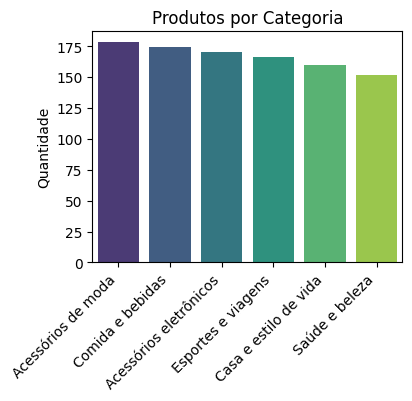

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Limpa a saída para remover mensagens anteriores
clear_output()

# Contagem dos produtos por categoria
contagem_produtos = df['linha_produto'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(4, 3))  # Define um gráfico pequeno
sns.barplot(x=contagem_produtos.index,
            y=contagem_produtos.values,
            hue=contagem_produtos.index,  # Define hue para evitar o warning
            dodge=False,  # Garante que todas as barras fiquem juntas
            legend=False,  # Remove a legenda
            palette='viridis')

# Ajustando os rótulos
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('Quantidade')
plt.title('Produtos por Categoria')

# Exibe o gráfico
plt.show()



**Olhando o resultado aparentemente é o Acessórios de moda, porém como a nossa base de dados divide por cliente, provavelmente este dado está errado devido a possibilidade de um cliente comprar 10 produtos de uma mesma categoria e ter o mesmo peso de um cliente que comprou apenas um.**



---

**Para respondermos a resposta de forma correta, temos que somar a quantidade vendida por categoria.**


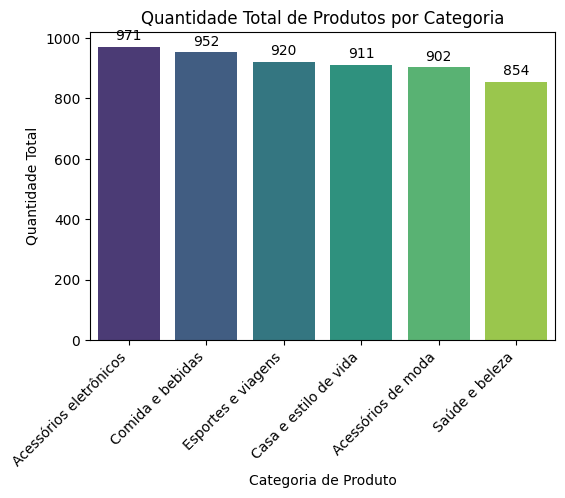

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Limpa a saída para remover mensagens anteriores
clear_output()

# Agrupando os dados pela categoria de produto e somando as quantidades
soma = df.groupby('linha_produto')['quantidade'].sum().sort_values(ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(6, 4))  # Define o gráfico um pouco maior

# Cria um gráfico de barras usando a soma das quantidades
ax = sns.barplot(x=soma.index,
                 y=soma.values,
                 hue=soma.index,  # Para colorir as barras de forma diferenciada
                 dodge=False,  # Garante que todas as barras fiquem juntas
                 legend=False,  # Remove a legenda
                 palette='viridis')  # Usando a paleta de cores 'viridis'

# Adicionando os valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Formatação dos valores
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 8),  # Distância do valor em relação à barra
                textcoords='offset points')

# Ajustando os rótulos
plt.xticks(rotation=45, ha='right')
plt.xlabel('Categoria de Produto')
plt.ylabel('Quantidade Total')
plt.title('Quantidade Total de Produtos por Categoria')

# Exibe o gráfico
plt.show()



**Qual o perfil dos clientes (por exemplo, tipo, sexo, localização) que mais compram?**

In [5]:
# Agrupar pelos três parâmetros e somar o total gasto
perfil_compras = df.groupby(['cidade', 'genero', 'tipo_cliente'])['quantidade'].sum().reset_index()

# Ordenar do maior para o menor total de compras
perfil_compras = perfil_compras.sort_values(by='quantidade', ascending=False)

# Exibir o resultado
print(perfil_compras)


       cidade     genero tipo_cliente  quantidade
4   Naypyitaw   Feminino       Membro         548
5   Naypyitaw   Feminino       Normal         501
10     Yangon  Masculino       Membro         499
0    Mandalay   Feminino       Membro         479
8      Yangon   Feminino       Membro         465
3    Mandalay  Masculino       Normal         464
11     Yangon  Masculino       Normal         451
2    Mandalay  Masculino       Membro         445
9      Yangon   Feminino       Normal         444
7   Naypyitaw  Masculino       Normal         433
1    Mandalay   Feminino       Normal         432
6   Naypyitaw  Masculino       Membro         349


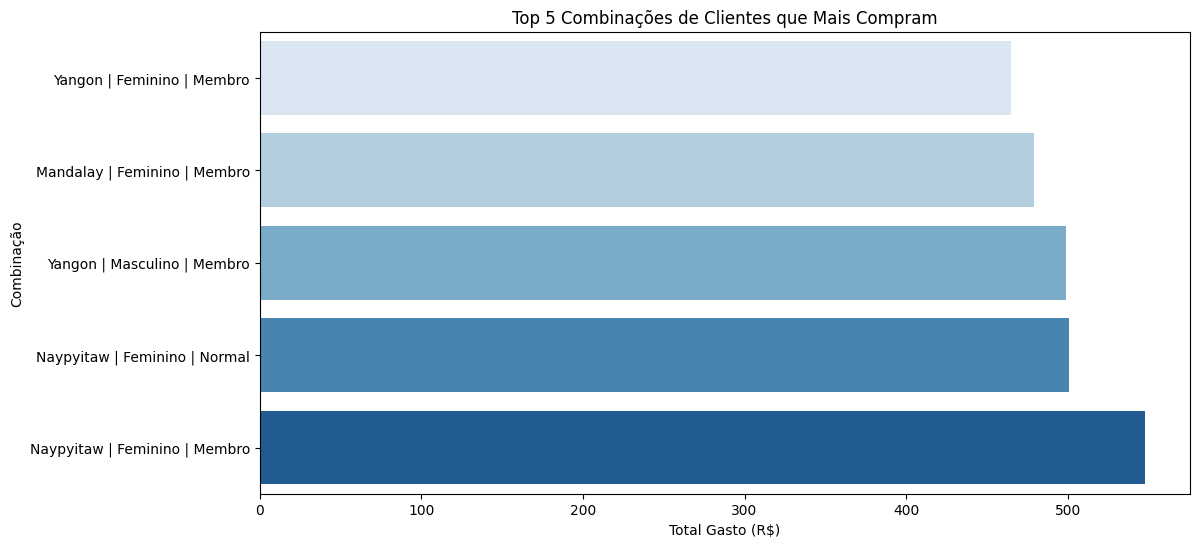

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar e somar o total gasto por combinação
perfil_compras = df.groupby(['cidade', 'genero', 'tipo_cliente'])['quantidade'].sum().reset_index()

# Ordenar do maior para o menor total de compras
perfil_compras = perfil_compras.sort_values(by='quantidade', ascending=False)

# Selecionar as 5 combinações que mais compram
top5 = perfil_compras.head(5).copy()  # Criar uma cópia para evitar SettingWithCopyWarning

# Criar rótulo personalizado para cada combinação
top5['combinação'] = top5['cidade'] + ' | ' + top5['genero'] + ' | ' + top5['tipo_cliente']

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='quantidade', y='combinação', data=top5, hue='combinação', palette='Blues_r', legend=False)  # Ajuste para FutureWarning

# Adicionar títulos e rótulos
plt.xlabel("Total Gasto (R$)")
plt.ylabel("Combinação")
plt.title("Top 5 Combinações de Clientes que Mais Compram")
plt.gca().invert_yaxis()  # Inverter para mostrar do maior para o menor

# Exibir o gráfico
plt.show()



# 5️⃣ Modelagem e Machine Learning (se aplicável)
Escolher modelos adequados (regressão, classificação, clustering, etc.).
Treinar e validar modelos com os dados disponíveis.
Ajustar hiperparâmetros para melhorar o desempenho.


# 6️⃣ Avaliação e Interpretação dos Resultados
Avaliar a performance dos modelos usando métricas adequadas (exemplo: acurácia, erro médio, etc.).
Comparar os resultados com a hipótese inicial.